Import


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_absolute_error


Data collection and cleaning

In [3]:
df = pd.read_csv("/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info() # getting information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking null value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling The Missing or null values

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# drop cabin column because that contain major null values
df = df.drop( columns="Cabin", axis=1)

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


<ipython-input-9-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-10-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Analysis


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# no of people survived or not
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Data Visualization


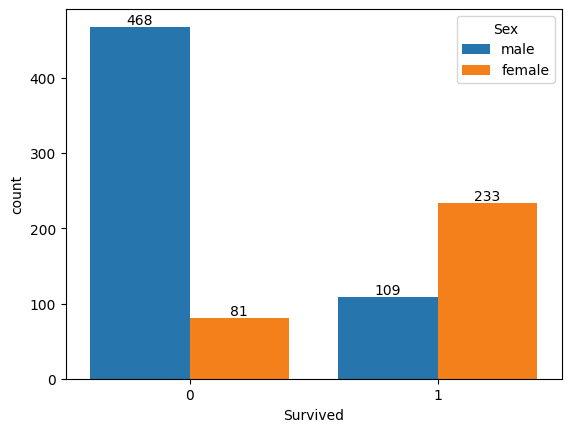

In [21]:
ax=sns.countplot( data=df, x=df['Survived'],saturation=0.9,hue=df['Sex'])
for container in ax.containers:
  ax.bar_label(container)

we see that female are survived more than man total 233 female and man are only 109 survived

[Text(0, 0, '216'), Text(0, 0, '184'), Text(0, 0, '491')]

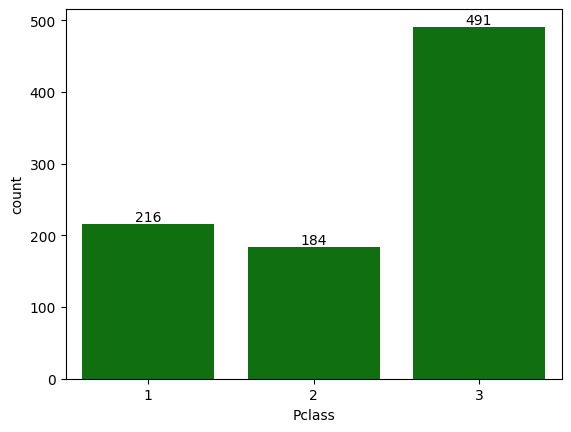

In [31]:
# making a count plot for pclass
ax=sns.countplot(data=df, x=df['Pclass'], color='green')
ax.bar_label(ax.containers[0])

[Text(0, 0, '136'), Text(0, 0, '87'), Text(0, 0, '119')]

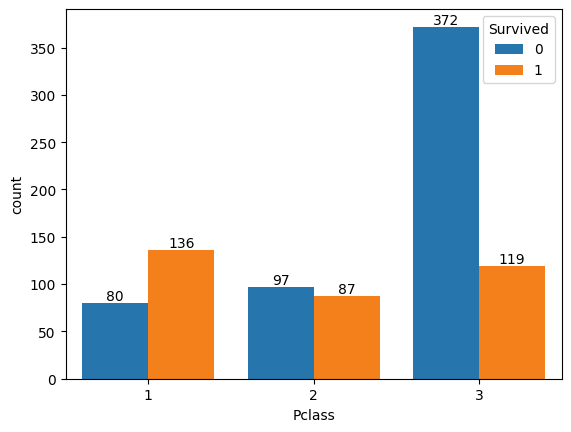

In [36]:
ax=sns.countplot( data=df, x=df['Pclass'],saturation=0.9,hue=df['Survived'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

here we conclude that people those are form first class it survive most and then second and third it is not survived comapare to first class.
In first class survived more than not survived
In second class both are almost same
In third class not survived more than survived

<Axes: >

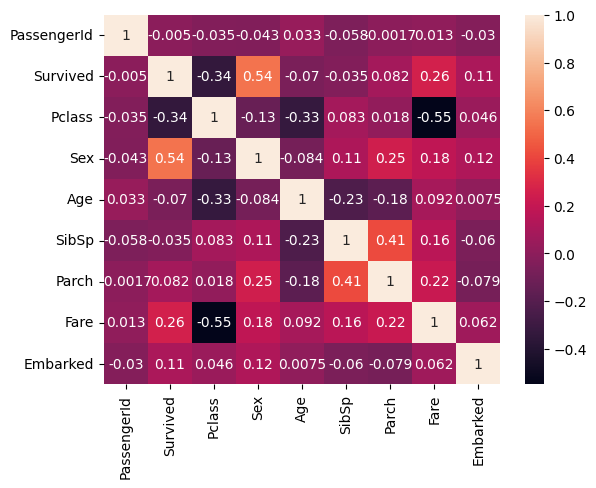

In [133]:
numeric_col=df.select_dtypes(include='number')
num_corr=numeric_col.corr()
sns.heatmap(num_corr,annot=True )


In [134]:
# Remove outliers using IQR for Fare
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows within 1.5 * IQR
df = df[(df['Age'] >= Q1 - 1.5 * IQR) & (df['Age'] <= Q3 + 1.5 * IQR)]


In [135]:
df['Age'].shape

(825,)

Encoding the categorical columns

In [37]:
# sex or embarked
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [38]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [43]:
# converting values
df.replace( {'Sex':{'male':0, 'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<ipython-input-43-1d55603c8d9f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace( {'Sex':{'male':0, 'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [47]:
df.head(2)
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.45,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,2


Seperating features and target

In [136]:
X=df.drop( columns=['Survived','Name','PassengerId','Ticket'], axis=1)
Y=df['Survived']

In [49]:
print(X) # contain features that are usefull for trainning our model

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


Split the data  , train and test


In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y ,test_size=0.2, random_state=2)

In [138]:
print(X.shape, X_train.shape, X_test.shape,Y_train.shape)
# we see the data partition

(825, 7) (660, 7) (165, 7) (660,)


Model Training - Logistic Regression


In [139]:
model=LogisticRegression()
# train model on training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [140]:
# accuraccy on training data
X_train_pred=model.predict(X_train)
print(X_train_pred)

[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 1 1 0 0 0 0 1 0 0 1 

In [141]:
training_acc=accuracy_score(Y_train, X_train_pred)
print(training_acc)

0.8075757575757576


we got 80% accuraccy on training data and 78% on test data

In [142]:
# accuraccy on test data
X_test_pred=model.predict(X_test)
test_acc=accuracy_score(Y_test,X_test_pred)
print("Accuracy on test data is :",test_acc)

Accuracy on test data is : 0.806060606060606


Using RandomForestClassifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
random_model=RandomForestClassifier(n_estimators=100, random_state=42)

In [144]:
random_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [145]:
predictions = random_model.predict(X_train)
randomforest_acc_train=accuracy_score(Y_train,predictions)
print("Accuracy for train data using RandomForestClassifier :",randomforest_acc_train)

Accuracy for train data using RandomForestClassifier : 0.9833333333333333


In [146]:
predictions = random_model.predict(X)
randomforest_acc_test=accuracy_score(Y,predictions)
print("Accuracy for test data using RandomForestClassifier :",randomforest_acc_test)

Accuracy for test data using RandomForestClassifier : 0.9442424242424242


Now we are cheking for Test file

In [147]:
test_df = pd.read_csv("/test.csv")

In [151]:
# test_df = df.drop(columns=", axis=1)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

test_df.replace( {'Sex':{ 'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
test_df.dropna()

<ipython-input-151-a5d327137b21>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
<ipython-input-151-a5d327137b21>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1
26,918,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,1
28,920,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,0
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,17765,27.7208,D40,1
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,20.0,0,0,SC/PARIS 2166,13.8625,D38,1
407,1299,1,"Widener, Mr. George Dunton",0,50.0,1,1,113503,211.5000,C80,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,C78,2


In [162]:
X_final_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [160]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X_final_test = test_df[features]  # Must match training features
X_final_test['Fare'].fillna(X_final_test['Fare'].mean(), inplace=True)

final_predictions = model.predict(X_final_test)

<ipython-input-160-7096fdfb1886>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_final_test['Fare'].fillna(X_final_test['Fare'].mean(), inplace=True)
<ipython-input-160-7096fdfb1886>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final_test['Fare'].fillna(X_final_test['Fare'].mean(), inplace=True)


In [161]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_predictions
})

submission.to_csv('submission.csv', index=False)